In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import LassoCV

from sklearn.feature_selection import SelectFromModel
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error


import scipy.stats as stats
import statsmodels.api as sm
#from textblob import TextBlob
%matplotlib inline

In [127]:
## Explore Data

#data.head()
# print(sf_data.shape)
# print(sf_data.columns)
# print(ny_data.columns)

print(ny_data.shape)
print(sf_data.shape)

(36757, 137)
(6293, 124)


# Lasso

In [2]:
ny_data = pd.read_csv('ny_data++_v4.csv', low_memory=False)
sf_data = pd.read_csv('sf++_clean_v4.csv', low_memory=False)

In [3]:
def get_common_columns(ny_data, sf_data):
    common_columns = set(ny_data.columns).intersection(set(sf_data.columns))
    # narrow down to same columns
    ny_data_1 = pd.DataFrame()
    sf_data_1 = pd.DataFrame()
    for item in common_columns:
        ny_data_1[item] = ny_data[item]
        sf_data_1[item] = sf_data[item]
    return ny_data_1, sf_data_1

In [4]:
print(ny_data.shape)
print(sf_data.shape)

(36760, 72)
(6293, 63)


In [5]:
ny_data, sf_data = get_common_columns(ny_data, sf_data)

In [6]:
print(ny_data.shape)
print(sf_data.shape)

(36760, 62)
(6293, 62)


In [268]:
print(sf_data.columns)

Index(['Hotel room', 'id', 'poverty_percent', 'Dome house', 'Tiny house',
       '80-84', 'cleaning_fee', 'Loft', 'Other', 'price', 'hotel_count',
       '50-59', 'sentiment_score', 'security_deposit', '90-94', 'Earth house',
       'Apartment', 'Resort', 'Guest suite', 'Serviced apartment',
       'number_of_reviews', 'Bungalow', 'dist_downtown', 'host_since',
       'restaurant_density', 'bathrooms', 'bedrooms', 'Guesthouse', '95-100',
       'Airbed', 'accommodates', 'House', 'commute_time_mins', '30-39',
       'Villa', '70-79', 'Hotel', 'Castle', '60-69', 'host_identity_verified',
       'Private room', 'host_is_superhost', 'Entire home/apt', 'Hostel',
       'Townhouse', 'guests_included', 'Pull-out Sofa', '20-29', '40-49',
       'host_has_profile_pic', '85-89', 'beds', 'Futon', 'Cottage',
       'Shared room', 'Condominium', 'Bed and breakfast', 'Couch', 'Real Bed',
       'Boutique hotel', 'Aparthotel', 'Cabin'],
      dtype='object')


In [7]:
#split into train and test, get y_train and y_test
X_train, X_test = train_test_split(ny_data, test_size = 0.2)
y_train = np.log(X_train['price'])
y_test = np.log(X_test['price'])

X_train.drop('price', axis = 1, inplace = True)
X_test.drop('price', axis = 1, inplace = True)
X_train.drop('id', axis = 1, inplace = True)
X_test.drop('id', axis = 1, inplace = True)

C:\Users\teoal\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
X_train.shape
# y_test.head()

(29408, 60)

In [45]:
# X_train = ny_data
# y_train = np.log(X_train['price'])
# X_train.drop('price', axis = 1, inplace = True)

In [9]:
SF_y = np.log(sf_data['price'].copy())
SF_X = sf_data.drop(['price', 'id'], axis = 1)

In [10]:
SF_X.head()
# y_train

,House,accommodates,Resort,host_has_profile_pic,host_is_superhost,Shared room,40-49,20-29,poverty_percent,90-94,...,Hotel,Tiny house,Airbed,Bungalow,Futon,commute_time_mins,Pull-out Sofa,85-89,Real Bed,80-84
0,0,3,0,1,1,0,0,0,8.597667,0,...,0,0,0,0,0,29.0,0,0,1,0
1,0,2,0,1,1,0,0,0,8.597667,0,...,0,0,0,0,0,29.0,0,1,1,0
2,0,2,0,1,1,0,0,0,8.597667,1,...,0,0,0,0,0,29.0,0,0,1,0
3,1,4,0,1,0,0,0,0,8.597667,0,...,0,0,0,0,0,29.0,0,0,1,0
4,0,3,0,1,0,0,0,0,8.597667,0,...,0,0,0,0,0,29.0,0,1,1,0


## Lasso Regression

In [11]:
clf = linear_model.Lasso(alpha=0.06)
clf.fit(X_train, y_train)
# print("alpha chosen : ", clf.alpha_) #alpha = 0.06

Lasso(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
predictions = clf.predict(SF_X)

In [13]:
print("Mean Square Error: ", mean_squared_error(SF_y, predictions))

Mean Square Error:  0.28473180373107365


In [282]:
validation_predict = clf.predict(X_test)

In [283]:
print("Mean Square Error: ", mean_squared_error(y_test, validation_predict))

Mean Square Error:  0.168203073958985


In [14]:
coef = pd.Series(clf.coef_, index = X_train.columns)
coef.head()

House                  -0.000000
accommodates            0.124306
Resort                  0.000000
host_has_profile_pic   -0.000000
host_is_superhost       0.000000
dtype: float64

In [15]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 10 variables and eliminated the other 50 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

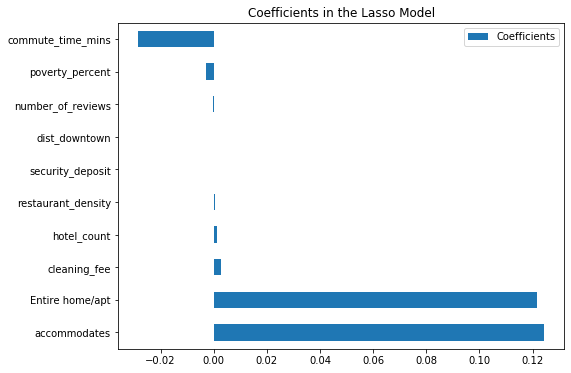

In [22]:
# imp_coef = pd.concat([coef.sort_values().head(10),
#                      coef.sort_values().tail(10)])


matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
coef2.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [17]:
coef1 = pd.DataFrame(coef, columns = ['Coefficients'])
# imp_coef = coef[] != 0coef.sort_values(ascending = False)

In [19]:
coef2 = coef1[coef1 != 0].dropna()

In [20]:
coef2 = coef2.sort_values(by=['Coefficients'],ascending=False)
coef2

,Coefficients
accommodates,1.243062e-01
Entire home/apt,1.217451e-01
cleaning_fee,2.597241e-03
hotel_count,1.029536e-03
restaurant_density,2.905749e-04
security_deposit,7.893330e-05
dist_downtown,-3.134846e-07
number_of_reviews,-3.307190e-04
poverty_percent,-3.024291e-03
commute_time_mins,-2.843052e-02


In [24]:
#check on correlation
corr_matrix = X_train.corr()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

In [26]:
sol.head(10)

accommodates     beds                      0.757100
beds             bedrooms                  0.665712
accommodates     bedrooms                  0.662277
Hotel room       Hotel                     0.612392
accommodates     guests_included           0.597710
beds             guests_included           0.519018
accommodates     cleaning_fee              0.482448
                 Entire home/apt           0.477641
host_since       host_identity_verified    0.475762
guests_included  bedrooms                  0.473097
dtype: float64

## Linear Regression

In [202]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1054.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:06:22   Log-Likelihood:                -12666.
No. Observations:               29408   AIC:                         2.545e+04
Df Residuals:                   29347   BIC:                         2.596e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

In [201]:
X2 = sm.add_constant(SF_X)
est = sm.OLS(SF_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     158.7
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:06:16   Log-Likelihood:                -3898.0
No. Observations:                6293   AIC:                             7912.
Df Residuals:                    6235   BIC:                             8303.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

C:\Users\teoal\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [284]:
# create linear regression object
reg = linear_model.LinearRegression()

In [285]:
# train the model
print("len of X_train cols ", len(X_train.columns))
reg.fit(X_train, y_train)

len of X_train cols  60


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [286]:
print("len of SF_X cols ", len(SF_X.columns))

len of SF_X cols  60


In [287]:
predictions = reg.predict(SF_X)
print("Mean Square Error: ", mean_squared_error(SF_y, predictions))
print("Mean Absolute Error: ", mean_absolute_error(SF_y, predictions))
print("R^2 Error: ", r2_score(SF_y, predictions))

Mean Square Error:  0.2458389493112655
Mean Absolute Error:  0.3669930390485512
R^2 Error:  0.5036400450844893


In [288]:
pred = reg.predict(X_test)
print("Mean Square Error: ", mean_squared_error(y_test, pred))

Mean Square Error:  0.1362315550716509


In [180]:
SF_y

0       5.135798
1       4.595120
2       5.459586
3       4.174387
4       4.174387
          ...   
6306    4.382027
6307    4.867534
6308    3.912023
6309    4.317488
6310    4.605170
Name: price, Length: 6311, dtype: float64

In [181]:
predictions

array([4.47970057, 3.9668239 , 4.67740897, ..., 3.99560664, 3.95811805,
       4.41504236])

# Feature Selection

In [128]:
# ny_data = pd.read_csv('ny_listings_full_clean_dummies.csv', low_memory = False)
y_train = np.log(ny_data['price'])

In [129]:
X_train = ny_data.copy()
X_train.drop('price', axis = 1, inplace = True)
X_train.drop('zipcode', axis = 1, inplace = True)
X_train.drop('id', axis = 1, inplace=True)
X_train.drop('avg_income', axis = 1, inplace = True)

In [130]:
print(X_train.shape) #139 features

(36757, 133)


In [131]:
X_train

,commute,sentiment,poverty_percent,restaurant_density,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,rs_loc_0,rs_loc_2,rs_loc_3,rs_loc_4,rs_loc_5,rs_loc_6,rs_loc_7,rs_loc_8,rs_loc_9,rs_loc_10
0,38.8,0.349518,13.598493,163,11.000000,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,33.2,0.306673,31.795272,220,10.854795,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,25.3,0.317464,10.749646,204,10.843836,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,24.0,0.287821,12.221671,230,10.764384,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,31.2,0.428167,16.020548,194,10.835616,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36752,32.1,1.000000,6.892559,140,3.632877,0,8,8,1,0,...,0,0,0,0,0,0,0,0,0,1
36753,32.1,0.353611,6.892559,140,3.632877,0,8,8,1,0,...,0,0,0,0,0,0,0,0,0,1
36754,47.8,0.286071,10.039251,62,3.484932,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
36755,30.5,0.426548,24.707368,269,0.238356,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [132]:
X_train = normalize_sf(X_train, X_train)

In [133]:
clf = LassoCV()
sfm = SelectFromModel(clf)

In [134]:
sfm.fit(X_train, y_train)

C:\Users\teoal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv='warn',
                                  eps=0.001, fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=False,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [135]:
sfm.estimator_.coef_

array([-2.22891629e-01,  1.71267286e-02, -1.41150160e-02,  7.42948783e-03,
        7.20276168e-03,  1.41386996e-02, -0.00000000e+00, -0.00000000e+00,
       -1.72247658e-03,  1.80635156e-03,  1.62637474e-01,  3.30045173e-02,
        6.48134978e-02, -1.87485413e-02,  1.65035409e-02,  6.23140758e-02,
        2.88661427e-02,  0.00000000e+00, -1.72589887e-02, -2.53370969e-02,
        2.69550907e-03,  0.00000000e+00, -0.00000000e+00,  8.08262005e-03,
       -1.41136691e-04,  9.16107829e-03, -1.55006207e-03, -0.00000000e+00,
        2.97535522e-03,  5.97078689e-03,  4.14028920e-02,  3.31544718e-03,
       -2.11459454e-03, -5.88939855e-03, -0.00000000e+00,  0.00000000e+00,
       -3.47413100e-04,  1.91540211e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -3.10775006e-03,
       -9.13173186e-03,  1.90753011e-02, -6.63788553e-03,  5.57407349e-03,
       -0.00000000e+00,  2.07301157e-02,  5.55302635e-04,  3.14456703e-03,
        4.21492627e-02,  

In [136]:
sfm.threshold_ #1e-05

1e-05

In [137]:
sfm.get_support()

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False, False, False,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,

In [138]:
X_train_cols = list(X_train.columns)

In [139]:
support_list = sfm.get_support().tolist()

In [140]:
remaining_cols = []
for i in range(0, len(support_list)):
    if support_list[i]:
        remaining_cols.append(X_train_cols[i])

In [141]:
remaining_cols

['commute',
 'sentiment',
 'poverty_percent',
 'restaurant_density',
 'host_since',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'number_of_reviews_ltm',
 'review_scores_value',
 'instant_bookable',
 'require_guest_phone_verification',
 'reviews_per_month',
 'Aparthotel',
 'Apartment',
 'Bed and breakfast',
 'Boat',
 'Boutique hotel',
 'Bungalow',
 'Cabin',
 'Camper/RV',
 'Cave',
 'Condominium',
 'Guesthouse',
 'Hostel',
 'Hotel',
 'House',
 'Houseboat',
 'Loft',
 'Nature lodge',
 'Other',
 'Resort',
 'Serviced apartment',
 'Tent',
 'Villa',
 'Entire home/apt',
 'Hotel room',
 'Shared room',
 'Couch',
 'Futon',
 'Pull-out Sofa',
 'flexible',
 'strict',
 'strict_14_with_grace_period',
 'super_strict_30',
 'super_strict_60',
 '20-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '85-89',
 '95-100',
 'rs_acc_0',
 'rs_acc_2',
 'rs_acc_3',
 'rs_acc_4',
 'r

In [142]:
sfm.get_support().size

133

In [135]:
# n_features = sfm.transform(X_train)

In [115]:
# n_features

In [143]:
# get new X_train, rename as X_train1
X_train1 = pd.DataFrame()
for item in remaining_cols:
    X_train1[item] = X_train[item]

In [117]:
#add back log(price)
#X_train1['price'] = y_train

In [144]:
X_train1.shape #36760, 93

(36757, 89)

In [145]:
#un-normalized version of X
X_train_unnorm = pd.DataFrame()
for item in remaining_cols:
    X_train_unnorm[item] = ny_data[item]

In [146]:
X_train_unnorm

,commute,sentiment,poverty_percent,restaurant_density,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,...,rs_chkin_6,rs_chkin_7,rs_chkin_8,rs_comm_3,rs_comm_4,rs_comm_7,rs_comm_10,rs_loc_2,rs_loc_9,rs_loc_10
0,38.8,0.349518,13.598493,163,11.000000,0,1,1,3,1.0,...,0,0,0,0,0,0,0,0,0,1
1,33.2,0.306673,31.795272,220,10.854795,0,1,1,1,1.0,...,0,0,0,0,0,0,1,0,1,0
2,25.3,0.317464,10.749646,204,10.843836,0,1,0,2,1.0,...,0,0,0,0,0,0,1,0,1,0
3,24.0,0.287821,12.221671,230,10.764384,0,1,0,2,1.0,...,0,0,0,0,0,0,0,0,0,1
4,31.2,0.428167,16.020548,194,10.835616,0,1,1,1,1.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36752,32.1,1.000000,6.892559,140,3.632877,0,1,0,2,2.0,...,0,0,0,0,0,0,1,0,0,1
36753,32.1,0.353611,6.892559,140,3.632877,0,1,0,2,2.0,...,0,0,0,0,0,0,1,0,0,1
36754,47.8,0.286071,10.039251,62,3.484932,0,1,0,2,1.0,...,0,0,0,0,0,0,1,0,0,1
36755,30.5,0.426548,24.707368,269,0.238356,0,1,0,6,1.0,...,0,0,0,0,0,0,1,0,0,1


# Run SVR

In [147]:
ny_data1 = X_train1.copy()

In [148]:
#Get SF_y
SF_y = np.log(sf_data['price'])

In [149]:
print(ny_data1.columns)

Index(['commute', 'sentiment', 'poverty_percent', 'restaurant_density',
       'host_since', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'security_deposit', 'cleaning_fee', 'guests_included',
       'number_of_reviews_ltm', 'review_scores_value', 'instant_bookable',
       'require_guest_phone_verification', 'reviews_per_month', 'Aparthotel',
       'Apartment', 'Bed and breakfast', 'Boat', 'Boutique hotel', 'Bungalow',
       'Cabin', 'Camper/RV', 'Cave', 'Condominium', 'Guesthouse', 'Hostel',
       'Hotel', 'House', 'Houseboat', 'Loft', 'Nature lodge', 'Other',
       'Resort', 'Serviced apartment', 'Tent', 'Villa', 'Entire home/apt',
       'Hotel room', 'Shared room', 'Couch', 'Futon', 'Pull-out Sofa',
       'flexible', 'strict', 'strict_14_with_grace_period', 'super_strict_30',
       'super_strict_60', '20-29', '30-39', '40-49', '50-59', '60-69', '85-89',
       '95-100', 'rs_acc_0', 'rs_a

In [150]:
def get_common_columns(ny_data, sf_data):
    common_columns = set(ny_data.columns).intersection(set(sf_data.columns))
    # narrow down to same columns
    ny_data_1 = pd.DataFrame()
    sf_data_1 = pd.DataFrame()
    for item in common_columns:
        ny_data_1[item] = ny_data[item]
        sf_data_1[item] = sf_data[item]
    return ny_data_1, sf_data_1

In [151]:
ny_data1, sf_data1 = get_common_columns(ny_data1, sf_data)

In [152]:
X_train_unnorm, sf_data1 = get_common_columns(X_train_unnorm, sf_data1)

In [153]:
print(sf_data1.shape)
print(ny_data1.shape)

(6293, 81)
(36757, 81)


In [154]:
print(X_train_unnorm.shape)

(36757, 81)


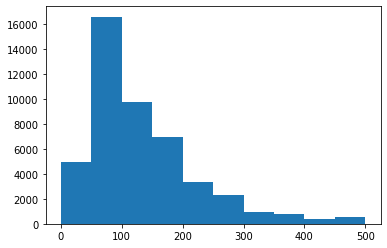

In [6]:
#plot price distribution
price = ny_data['price']
ranges = (0,500)
plt.hist(price, bins = 10, range = ranges)
plt.show()

#log of price

In [ ]:
#X_train.skew(axis = 0) #skew of price = 24

In [52]:
#drop id
#ny_data1 = ny_data.drop('id', axis = 1)
# ny_data1.drop('id', axis = 1, inplace = True)

In [155]:
print(sf_data1.columns)

Index(['20-29', 'rs_clean_7', 'Hotel', 'rs_loc_10', 'rs_chkin_6', 'Loft',
       'Villa', 'rs_acc_3', 'Boutique hotel', 'rs_comm_4', '85-89',
       'rs_clean_5', 'Hotel room', 'accommodates', 'bedrooms', 'rs_acc_5',
       'rs_comm_10', 'host_has_profile_pic', 'rs_clean_2', 'host_since',
       '50-59', 'rs_chkin_2', 'Bed and breakfast', 'rs_clean_8', 'rs_chkin_4',
       'House', 'Hostel', 'Shared room', 'rs_clean_0', '30-39', 'Guesthouse',
       'rs_chkin_7', 'host_identity_verified', 'Entire home/apt', 'rs_clean_4',
       '60-69', 'rs_clean_10', 'rs_loc_9', 'rs_loc_2', 'super_strict_60',
       'security_deposit', 'instant_bookable', 'Couch',
       'require_guest_phone_verification', 'rs_chkin_0', 'Condominium',
       'Serviced apartment', 'Resort', 'strict', 'Apartment', '40-49',
       'strict_14_with_grace_period', 'Other', 'host_is_superhost',
       'Aparthotel', 'beds', 'review_scores_value', 'rs_acc_4', 'rs_acc_8',
       '95-100', 'poverty_percent', 'rs_acc_0', 'Bungalo

In [156]:
# Get SF Data
# SF_y = np.log(sf_data1['price'])
# SF_X = sf_data1.drop('price', axis = 1)
SF_X = sf_data1.copy()

In [157]:
SF_X

,20-29,rs_clean_7,Hotel,rs_loc_10,rs_chkin_6,Loft,Villa,rs_acc_3,Boutique hotel,rs_comm_4,...,bathrooms,sentiment,Futon,Pull-out Sofa,rs_comm_7,rs_chkin_8,rs_clean_3,guests_included,commute,reviews_per_month
0,0,0,0,1,0,0,0,0,0,0,...,2.0,0.409691,0,0,0,0,0,4,22.6,0
1,0,0,0,1,0,1,0,0,0,0,...,1.5,0.476327,0,0,0,0,0,2,22.6,0
2,0,0,0,1,0,0,0,0,0,0,...,2.0,0.433179,0,0,0,0,0,3,22.6,0
3,0,0,0,1,0,0,0,0,0,0,...,1.0,0.387500,0,0,0,0,0,1,22.6,0
4,0,0,0,1,0,1,0,0,0,0,...,1.5,0.447659,0,0,0,0,0,1,22.6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6288,0,0,0,1,0,0,0,0,0,0,...,1.0,0.393750,0,0,0,0,0,4,32.9,1
6289,0,0,0,1,0,0,0,0,0,0,...,1.0,0.542833,0,0,0,0,0,2,32.9,1
6290,0,0,0,1,0,0,0,0,0,0,...,1.0,0.800000,0,0,0,0,0,2,32.9,2
6291,0,0,0,1,0,0,0,0,0,0,...,1.0,0.415000,0,0,0,0,0,2,32.9,1


In [55]:
# # NY Data
# X_train = ny_data1.copy()

In [146]:
#Get Y. Log transformation.
# y_train = np.log(X_train['price'])
# y_valid = np.log(X_valid['price'])
# y_test = np.log(X_test['price'])

# y_train = X_train['price']
# y_valid = X_valid['price']
# y_test = X_test['price']

In [147]:
# X_train.drop('price', axis = 1, inplace = True)
# X_valid.drop('price', axis = 1, inplace = True)
# X_test.drop('price', axis = 1, inplace = True)
# ny_data1.drop('price', axis = 1, inplace = True)

C:\Users\teoal\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
# #normalize data
# X_train, X_valid, X_test = normalization_train_and_vali(X_train, X_valid, X_test)

In [74]:
ny_data1.head()

,20-29,rs_clean_7,Hotel,rs_loc_10,rs_chkin_6,Loft,Villa,rs_acc_3,Boutique hotel,rs_comm_4,...,bathrooms,sentiment,Futon,Pull-out Sofa,rs_comm_7,rs_chkin_8,rs_clean_3,guests_included,commute,reviews_per_month
0,-0.050092,-0.157434,-0.05818,0.717028,-0.077241,-0.171145,-0.026605,-0.007377,-0.057944,-0.038,...,-0.330435,-0.244904,-0.079698,-0.074706,-0.07303,-0.166198,-0.014754,-0.490473,0.487159,1.857299
1,-0.050092,-0.157434,-0.05818,-1.394646,-0.077241,-0.171145,-0.026605,-0.007377,-0.057944,-0.038,...,-0.330435,-0.592295,-0.079698,-0.074706,-0.07303,-0.166198,-0.014754,-0.490473,-0.302314,-0.765893
2,-0.050092,-0.157434,-0.05818,-1.394646,-0.077241,-0.171145,-0.026605,-0.007377,-0.057944,-0.038,...,-0.330435,-0.504795,-0.079698,-0.074706,-0.07303,-0.166198,-0.014754,0.335189,-1.416035,-0.481521
3,-0.050092,6.351886,-0.05818,0.717028,-0.077241,-0.171145,-0.026605,-0.007377,-0.057944,-0.038,...,-0.330435,-0.745145,-0.079698,-0.074706,-0.07303,-0.166198,-0.014754,-0.490473,-1.599305,1.213108
4,-0.050092,-0.157434,-0.05818,0.717028,-0.077241,-0.171145,-0.026605,-0.007377,-0.057944,-0.038,...,-0.330435,0.392781,-0.079698,-0.074706,-0.07303,-0.166198,-0.014754,-0.490473,-0.584269,-0.260987


In [158]:
#normalize SF data
SF_X = normalize_sf(X_train_unnorm, SF_X)

In [159]:
SF_X.head()

,20-29,rs_clean_7,Hotel,rs_loc_10,rs_chkin_6,Loft,Villa,rs_acc_3,Boutique hotel,rs_comm_4,...,bathrooms,sentiment,Futon,Pull-out Sofa,rs_comm_7,rs_chkin_8,rs_clean_3,guests_included,commute,reviews_per_month
0,-0.050092,-0.157434,-0.05818,0.717028,-0.077241,-0.171145,-0.026605,-0.007377,-0.057944,-0.038,...,2.060704,0.242975,-0.079698,-0.074706,-0.07303,-0.166198,-0.014754,1.986513,-1.796673,-0.823928
1,-0.050092,-0.157434,-0.05818,0.717028,-0.077241,5.842990,-0.026605,-0.007377,-0.057944,-0.038,...,0.865135,0.783264,-0.079698,-0.074706,-0.07303,-0.166198,-0.014754,0.335189,-1.796673,-0.823928
2,-0.050092,-0.157434,-0.05818,0.717028,-0.077241,-0.171145,-0.026605,-0.007377,-0.057944,-0.038,...,2.060704,0.433414,-0.079698,-0.074706,-0.07303,-0.166198,-0.014754,1.160851,-1.796673,-0.823928
3,-0.050092,-0.157434,-0.05818,0.717028,-0.077241,-0.171145,-0.026605,-0.007377,-0.057944,-0.038,...,-0.330435,0.063053,-0.079698,-0.074706,-0.07303,-0.166198,-0.014754,-0.490473,-1.796673,-0.823928
4,-0.050092,-0.157434,-0.05818,0.717028,-0.077241,5.842990,-0.026605,-0.007377,-0.057944,-0.038,...,0.865135,0.550821,-0.079698,-0.074706,-0.07303,-0.166198,-0.014754,-0.490473,-1.796673,0.917128


In [16]:
#normalize data
from sklearn. preprocessing import StandardScaler

#for test data- use the means and standard deviations saved from training data, rather than computing them from test data
def normalization_train_and_vali(train_X, valid_X, test_X):
    scaler = StandardScaler()
    scaler.fit(train_X)
    X_train = scaler.transform(train_X)
    X_valid = scaler.transform(valid_X)
    X_test = scaler.transform(test_X)
    
    #convert array to dataframe
    X_train = pd.DataFrame(X_train, columns = train_X.columns)
    X_valid = pd.DataFrame(X_valid, columns = train_X.columns)
    X_test = pd.DataFrame(X_test, columns = train_X.columns)
    
    return X_train, X_valid, X_test

In [15]:
#normalize data
from sklearn. preprocessing import StandardScaler

def normalize_sf(train_X, test_X):
    ''' normalize the SF data set using NY. Returns normalized SF X data '''
    scaler = StandardScaler()
    scaler.fit(train_X)
    X_train = scaler.transform(train_X)
    X_test = scaler.transform(test_X)
    
    #convert array to dataframe
    X_train = pd.DataFrame(X_train, columns = train_X.columns)
    X_test = pd.DataFrame(X_test, columns = train_X.columns)

    return X_test


In [86]:
#SVR
def svr(X_train, y_train, X_valid, y_valid):
    model = SVR(C = 10, gamma = 0.001)
    model.fit(X_train, y_train)
    
    print("training metrics:")
    evaluation_metrics(model, X_train, y_train)
    
    print("validation metrics")
    evaluation_metrics(model, X_valid, y_valid)
    return model

In [87]:
def evaluation_metrics(trained_model, X_test, y_test):
    predicted_values = trained_model.predict(X_test)
    print("Mean Absolute Error: ", 
          metrics.mean_absolute_error(y_test, predicted_values))
    print("Mean Squared Error: ", metrics.mean_squared_error(y_test, \
                                                             predicted_values))
    print("R2: ", metrics.r2_score(y_test, predicted_values))

In [160]:
# train on NY, test on SF
trainNY_testSF = svr(ny_data1, y_train, SF_X, SF_y)

training metrics:
Mean Absolute Error:  0.24979158777854518
Mean Squared Error:  0.1216106616155925
R2:  0.7209813071484108
validation metrics
Mean Absolute Error:  0.3507376842433729
Mean Squared Error:  0.22584856209366835
R2:  0.5440015407948657


In [69]:
predictedSF_y = trainNY_testSF.predict(SF_X)

In [73]:
predictedSF_y = np.exp(predictedSF_y)

array([193.6257469 , 106.88379104, 108.34703462, ..., 139.41402407,
        92.71678224, 208.96771749])

In [75]:
pd.DataFrame(predictedSF_y).to_csv("predictedSF.csv")

In [182]:
#hyperparameter tuning
# use R^2 as criteria, as we are interested in prediction
# default = 5-fold cross validation
#{'C': 10, 'gamma': 0.001}

from sklearn.model_selection import GridSearchCV

def svr_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1, 10]
    param_grid = {'C': Cs, 'gamma': gammas}
    svr = SVR()
    grid_search = GridSearchCV(svr, param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    print(grid_search.best_params_)
    return grid_search.best_params_

In [183]:
best_params = svr_param_selection(X_train, y_train)

/home/alteo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 10, 'gamma': 0.001}
